# PROJECT REPORT ON COMPANY X'S EMPLOYEE ATTRITION PROBLEM
### **Project Statement**
<font size='4'> The project statement states:
* Determine what type of emmployees are leaving
* Determine which employees are prone to leave next</font>


## DETERMINE WHAT TYPE OF EMPLOYEES ARE LEAVING
<font size='4'>To do this, I analyzed the data using Tableau visualizations and the following insights were discovered:
* Employees who have worked on 3-4 projects are less likely to leave the company. Those who have worked on 6-7 projects may feel stressed and those who have worked on 2 may feel undervalued.
* Most of the employees who have left are from the sales, technical, and support departments respectively.
* After 3-5 years of working in the company, employees are more likely to leave. Those who have stayed for longer or lesser periods generally do not leave.
* Most employees have low or medium salary and tend to quit their jobs. Further analysis needs to be done to determine if the company’s wages are competitive.
* Majority of the workers who are leaving have not been promoted in the last five years.</font>


## DETERMINE WHAT EMPLOYEES ARE PRONE TO LEAVE NEXT

<font size='4'>To predict this, I will train a Gradient Boosting classifier model on the dataset. This is an algorithm that combines weak learning models using loss function to generate stronger models. The dataset will be split into training and testing sets(70%and 30% respectively). The model wil be fit on the training set and evaluated on the testing set, and an accuracy score will be obtained.

Next, I will make a prediction on the dataset of existing employees with the model that will be built. From this prediction, the model will be able to deduce employees that are likely to leave. </font>




## DATASET DESCRIPTION
<font size='4'>The data is for company X which is trying to control attrition. There are two sets of data: “Existing employees”
and “Employees who have left”. Following columns are available for every employee:
* Emp ID - employee ID 
* satisfaction_level - level of satisfaction with their job
* last_evaluation - last evaluation received
* number_project - number of projects they've worked on
* average_montly_hours - average monthly hours spent working
* time_spend_company - years spent at the company
* Work_accident - whether they have had a work accident
* promotion_last_5years - whether they have had a promotion in the last 5 years
* dept - Departments
* salary - Salary
* status - 0 represents existing employees and 1 represents employees that have left</font>

In [3]:
#import modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# load and display dataset
df = pd.read_excel('emp.xlsx')
df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
0,7439,0.52,0.70,4,219,3,0,0,hr,medium,0
1,14769,0.43,0.57,2,157,3,0,0,sales,low,1
2,12710,0.42,0.48,2,140,3,0,0,sales,low,1
3,4172,0.72,0.81,4,134,2,0,0,support,low,0
4,6079,0.57,0.65,3,163,2,0,0,support,low,0


### Data Preprocessing

In [5]:
# check for null values
df.isnull().sum()

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
status                   0
dtype: int64

In [6]:
# dataset description
df.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,status
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,4329.982679,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


<font size='4'>The above description shows there are no outliers in the dataset since the 75% values and maximum values are in close ranges</font>

In [7]:
# dropping employee ID as it will not be relevant in this analysis
df = df.drop('Emp ID', axis=1)

In [8]:
# number of rows and columns
df.shape

(14999, 10)

In [9]:
# grouping employee status to show those that have left and existing employes
gone = df.groupby('status')
gone.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
status,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [10]:
# shows number of existing and previous employees
df['status'].value_counts()

0    11428
1     3571
Name: status, dtype: int64

## Clustering

In [11]:
# clustering is going to be based on employees satisfaction level and last evaluation
have_left =  df[['satisfaction_level', 'last_evaluation']][df.status == 1]

In [12]:
# to determine K (number of clusters)
from sklearn.cluster import KMeans
cluster_range=range(1,10)
cluster_errors = []

for x in cluster_range:
    clusters = KMeans(x)
    clusters.fit(have_left)
    cluster_errors.append(clusters.inertia_)


In [13]:
cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})
cluster_df[0:10]

,num_clusters,cluster_errors
0,1,388.186144
1,2,154.707971
2,3,27.007708
3,4,22.377852
4,5,18.989120
5,6,16.049738
6,7,13.656352
7,8,11.901015
8,9,10.235666


Text(0, 0.5, 'Value')

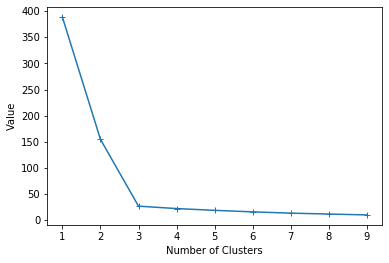

In [14]:
plt.plot(cluster_df.num_clusters, cluster_df.cluster_errors, marker='+')
plt.xlabel('Number of Clusters')
plt.ylabel('Value')

<font size='4'>The above diagram shows 3 clusters would be best for this data because at 3 clusters, the number of cluster errors drop drastically as shown above</font>

In [15]:
# creating a kmeans object and fitting it on employees who have left
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(have_left)

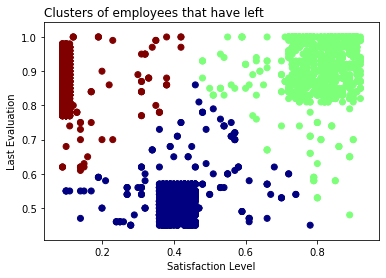

In [16]:
# plotting
have_left['label'] = kmeans.labels_

# scatter plot
plt.scatter(have_left['satisfaction_level'], have_left['last_evaluation'], c=have_left['label'],cmap='jet')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('Clusters of employees that have left', loc='left')
# saving the plot
plt.savefig('cluster.png')
plt.show()

### Building Gradient Boosting Classifier Model

In [17]:
# Encoding Categorical Variables
from sklearn import preprocessing
encode = preprocessing.LabelEncoder()

df['salary']=encode.fit_transform(df['salary'])
df['dept']=encode.fit_transform(df['dept'])

In [18]:
# defining predictor(X) and target(y) variables
X=df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary']]
y=df['status']

In [19]:
# splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

In [20]:
# Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

# creating an object
gb = GradientBoostingClassifier()

# fitting
gb.fit(X_train, y_train)

#Predicting
y_pred = gb.predict(X_test)

In [21]:
#Calculating accuracy
from sklearn import metrics
#accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9746666666666667
Precision: 0.9545454545454546
Recall: 0.9364326375711575


In [22]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[3399   47]
 [  67  987]]


## Predicting on exisiting employees

In [27]:
# loading and displaying the dataset
df2 = pd.read_excel('Existing employees.xlsx')
df2.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
0,2001,0.58,0.74,4,215,3,0,0,sales,low,existing
1,2002,0.82,0.67,2,202,3,0,0,sales,low,existing
2,2003,0.45,0.69,5,193,3,0,0,sales,low,existing
3,2004,0.78,0.82,5,247,3,0,0,sales,low,existing
4,2005,0.49,0.60,3,214,2,0,0,sales,low,existing


In [28]:
# dropping status and employee id
df2 = df2.drop(['status','Emp ID'], axis=1)

In [29]:
df2.shape

(11428, 9)

In [30]:
# creating a copy of the dataset
df3 = df2.copy()

In [31]:
# encoding categorical variables
from sklearn import preprocessing

encode2 = preprocessing.LabelEncoder()

df2['salary']=encode2.fit_transform(df2['salary'])
df2['dept']=encode2.fit_transform(df2['dept'])

df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0.58,0.74,4,215,3,0,0,7,1
1,0.82,0.67,2,202,3,0,0,7,1
2,0.45,0.69,5,193,3,0,0,7,1
3,0.78,0.82,5,247,3,0,0,7,1
4,0.49,0.60,3,214,2,0,0,7,1


In [32]:
# predicting
predict = gb.predict(df2)

In [33]:
# making prediction into a dataframe
prediction = pd.DataFrame(predict, columns=['pred'])
prediction.head()

,pred
0,0
1,0
2,0
3,0
4,0


In [34]:
prediction['pred'].value_counts()

0    11312
1      116
Name: pred, dtype: int64

<font size='4'>This shows that **116 employees** are likely to leave the company.</font>

In [36]:
# merging prediction with dataset
merge_df = pd.merge(df3, prediction, on=df3.index)

merge_df

,key_0,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,pred
0,0,0.58,0.74,4,215,3,0,0,sales,low,0
1,1,0.82,0.67,2,202,3,0,0,sales,low,0
2,2,0.45,0.69,5,193,3,0,0,sales,low,0
3,3,0.78,0.82,5,247,3,0,0,sales,low,0
4,4,0.49,0.60,3,214,2,0,0,sales,low,0
...,...,...,...,...,...,...,...,...,...,...,...
11423,11423,0.90,0.55,3,259,10,1,1,management,high,0
11424,11424,0.74,0.95,5,266,10,0,1,management,high,0
11425,11425,0.85,0.54,3,185,10,0,1,management,high,0
11426,11426,0.33,0.65,3,172,10,0,1,marketing,high,0


In [37]:
# selecting only employees that are likely to leave
leaving = merge_df[merge_df['pred']==1]
leaving.drop(columns=['key_0'], inplace=True)
# resetting index
leaving = leaving.reset_index()
leaving

C:\Users\CHIDERA ANI\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,index,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,pred
0,12,0.48,0.94,5,255,6,0,0,accounting,medium,1
1,18,0.89,0.92,4,165,5,0,0,hr,medium,1
2,160,0.46,0.69,2,159,2,0,0,sales,low,1
3,261,0.83,0.54,4,259,5,0,0,support,medium,1
4,415,0.92,0.97,4,238,5,1,0,support,medium,1
...,...,...,...,...,...,...,...,...,...,...,...
111,10599,0.65,0.91,4,243,5,1,0,IT,medium,1
112,10815,0.43,0.46,2,186,2,0,0,product_mng,low,1
113,10846,0.75,0.99,2,237,5,1,0,product_mng,low,1
114,11266,0.43,0.88,2,149,4,0,0,product_mng,medium,1


In [38]:
leaving.drop(columns=['index'], inplace=True)

In [39]:
leaving.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,pred
0,0.48,0.94,5,255,6,0,0,accounting,medium,1
1,0.89,0.92,4,165,5,0,0,hr,medium,1
2,0.46,0.69,2,159,2,0,0,sales,low,1
3,0.83,0.54,4,259,5,0,0,support,medium,1
4,0.92,0.97,4,238,5,1,0,support,medium,1


In [40]:
#saving the prediction to an excel file
leaving.to_excel("employees_likely_to_leave.xlsx")

In [45]:
leaving['salary'].value_counts()

medium    54
low       54
high       8
Name: salary, dtype: int64

In [47]:
leaving['dept'].value_counts()

sales          29
technical      20
product_mng    16
support        15
RandD           9
accounting      8
IT              8
management      5
hr              4
marketing       2
Name: dept, dtype: int64

In [48]:
leaving['promotion_last_5years'].value_counts()

0    114
1      2
Name: promotion_last_5years, dtype: int64

In [49]:
leaving['time_spend_company'].value_counts()

5    52
3    24
6    19
2    13
4     8
Name: time_spend_company, dtype: int64

In [50]:
leaving['number_project'].value_counts()

2    50
4    18
6    17
5    17
3    14
Name: number_project, dtype: int64

## CONCLUSION
<font size='4'>The above shows that most employees that are likely to leave are/have:
* from the sales and techincal department
* on low and medium salaries
* without promotion in the last 5 years
* spent 3 and 5 years in the company
* worked on a few number of projects
    
This analysis shows that all assumptions made from the Tableau analysis are true. Company X is thereby advised to look into these issues and provide adequate solutions. Thank you. </font>